In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
import re  # Import the 're' library for regular expressions
from wordcloud import WordCloud

In [2]:
df=pd.read_csv(r'C:/Users/Dhanashree/Downloads/archive/tweets/data_science.csv')

C:\Users\Dhanashree\AppData\Local\Temp\ipykernel_17816\2212089181.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:/Users/Dhanashree/Downloads/archive/tweets/data_science.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241386 entries, 0 to 241385
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               241386 non-null  int64  
 1   conversation_id  241386 non-null  int64  
 2   created_at       241386 non-null  object 
 3   date             241386 non-null  object 
 4   time             241386 non-null  object 
 5   timezone         241386 non-null  int64  
 6   user_id          241386 non-null  int64  
 7   username         241386 non-null  object 
 8   name             241386 non-null  object 
 9   place            354 non-null     object 
 10  tweet            241386 non-null  object 
 11  language         241386 non-null  object 
 12  mentions         241386 non-null  object 
 13  urls             241386 non-null  object 
 14  photos           241386 non-null  object 
 15  replies_count    241386 non-null  int64  
 16  retweets_count   241386 non-null  int6

In [4]:
df.isnull().sum()

id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                    0
place              241032
tweet                   0
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet                 0
quote_url          231065
video                   0
thumbnail          131048
near               241386
geo                241386
source             241386
user_rt_id         241386
user_rt            241386
retweet_id         241386
reply_to                0
retweet_date       241386
translate          241386
trans_src          241386
trans_dest         241386
dtype: int64

Dropping the column with most of the null values

In [5]:
df.drop(['place','quote_url','thumbnail','near','geo','source','user_rt_id','user_rt','retweet_id','retweet_date','translate','trans_src','trans_dest'],axis=1,inplace=True)

In [6]:
df.isnull().sum()

id                 0
conversation_id    0
created_at         0
date               0
time               0
timezone           0
user_id            0
username           0
name               0
tweet              0
language           0
mentions           0
urls               0
photos             0
replies_count      0
retweets_count     0
likes_count        0
hashtags           0
cashtags           0
link               0
retweet            0
video              0
reply_to           0
dtype: int64

Let's view the date the tweets have been made

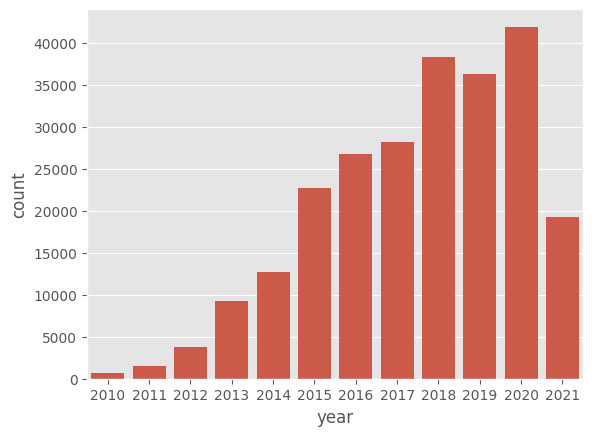

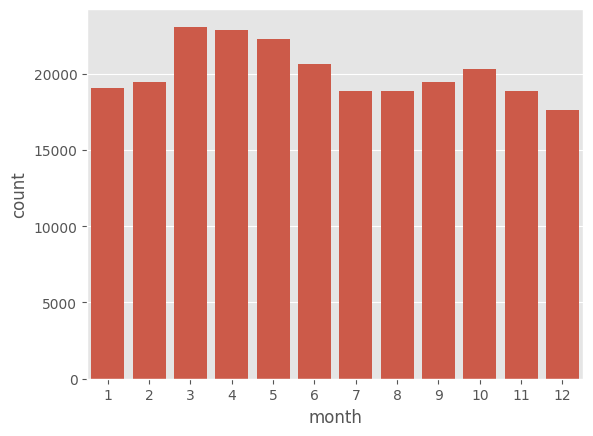

In [7]:
df['year'] = pd.DatetimeIndex(df['date']).year
sns.countplot(x ='year', data = df) 
plt.show()
df['month'] = pd.DatetimeIndex(df['date']).month
sns.countplot(x ='month', data = df) 
plt.show()

In [8]:
# Function to remove special characters
def remove_special_characters(text):
    # Define the pattern for special characters (anything that is not alphanumeric or whitespace)
    pattern = r'[^a-zA-Z0-9\s]'
    # Replace special characters with an empty string
    text = re.sub(pattern, '', text)
    return text

# Clean the 'tweet' column
df['clean_tweet'] = df['tweet'].apply(remove_special_characters)

# Print an example of a cleaned tweet
print(df['clean_tweet'][50])

APSkill has Associated with nasscomfs nasscom Initiative supported by github LAUNCHING ONLINE FREE Microsoft AI Classroom Series to deliver Microsofts ArtificialInteligence MachineLearning and DataScience expertise to Students Faculty and Researchers  httpstco4augiIghIa


In [9]:
df['tweet'].values[0]

'What can be done?  - Never blindly trust an abstract, a press release or a secondary source - Try to inspect the actual data (or the figures) - Accept it may well all be nonsense (even more so if the findings are extraordinary - sound science is often boring) 8/'

In [10]:
print(df.shape)
df = df.head(500)
print(df.shape)

(241386, 26)
(500, 26)


In [11]:
example =df['tweet'].values[0]
print(example)

What can be done?  - Never blindly trust an abstract, a press release or a secondary source - Try to inspect the actual data (or the figures) - Accept it may well all be nonsense (even more so if the findings are extraordinary - sound science is often boring) 8/


In [12]:
tokens=nltk.word_tokenize(example) #word_tokenize is a inbuilt function of nltk that is used to split a sentence into words 
tokens[:10]

['What', 'can', 'be', 'done', '?', '-', 'Never', 'blindly', 'trust', 'an']

In [13]:
tagged = nltk.pos_tag(tokens) #gives us part of speech tag
tagged[:10]

[('What', 'WP'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('done', 'VBN'),
 ('?', '.'),
 ('-', ':'),
 ('Never', 'RB'),
 ('blindly', 'RB'),
 ('trust', 'VBP'),
 ('an', 'DT')]

total score

In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dhanashree\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer #SentimentIntensityAnalyzer is a class provided by NLTK for sentiment analysis. It analyzes the sentiment of text by assigning scores to words and then aggregating them to determine the overall sentiment of the text.
from tqdm.notebook import tqdm #library for creating progress bars in loops and other iterative processes.
sia = SentimentIntensityAnalyzer() #sia is an object(instance) of class SentimentIntensityAnalyzer


In [16]:
sia.polarity_scores("I am so happy") #function that calculates the score of the piece of text

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [17]:
sia.polarity_scores(example)

{'neg': 0.108, 'neu': 0.798, 'pos': 0.094, 'compound': -0.1783}

In [18]:
#run the polarity score on the entire dataset
res = {}
for index, row in tqdm(df.iterrows(), total=len(df)):
    tweet = row['tweet']
    myid = row['id']
    res[myid] = sia.polarity_scores(tweet)
# here tqdm is used to monitor the progress of the loop as it iterates oover each row of the dataframe

  0%|          | 0/500 [00:00<?, ?it/s]

In [19]:
vaders = pd.DataFrame(res).T # T is n attribute that transposes the dataframe swapping the rows and columns, so that the sentiment scores become column headers and the IDs become row indices.
vaders = vaders.reset_index().rename(columns={'index':'id'})
vaders = vaders.merge(df, how='left')

In [20]:
#now we've sentiment score and metatdata
vaders.head()


,id,neg,neu,pos,compound,conversation_id,created_at,date,time,timezone,...,likes_count,hashtags,cashtags,link,retweet,video,reply_to,year,month,clean_tweet
0,1406400408545804288,0.108,0.798,0.094,-0.1783,1406400396264943616,2021-06-20 05:26:01 IST,2021-06-20,05:26:01,530,...,144,[],[],https://twitter.com/BallouxFrancois/status/140...,False,0,[],2021,6,What can be done Never blindly trust an abst...
1,1406390341176016897,0.109,0.750,0.141,0.0000,1406390341176016897,2021-06-20 04:46:01 IST,2021-06-20,04:46:01,530,...,27,[],[],https://twitter.com/TDataScience/status/140639...,False,0,[],2021,6,We need a paradigm shift from modelcentric to ...
2,1406386311481774083,0.000,1.000,0.000,0.0000,1406386311481774083,2021-06-20 04:30:00 IST,2021-06-20,04:30:00,530,...,49,[],[],https://twitter.com/ScienceNews/status/1406386...,False,0,[],2021,6,Using highresolution satellite data and comput...
3,1406383545153638402,0.000,0.601,0.399,0.7430,1406383545153638402,2021-06-20 04:19:01 IST,2021-06-20,04:19:01,530,...,6,[],[],https://twitter.com/TDataScience/status/140638...,False,0,[],2021,6,StephensonData shares four steps that will hel...
4,1406358632648818689,0.000,0.930,0.070,0.4019,1406358632648818689,2021-06-20 02:40:01 IST,2021-06-20,02:40:01,530,...,9,[],[],https://twitter.com/TDataScience/status/140635...,False,0,[],2021,6,Curricula is inherently brittle in a world whe...


C:\Users\Dhanashree\AppData\Local\Temp\ipykernel_17816\3381351441.py:12: UserWarning: Glyph 128526 (\N{SMILING FACE WITH SUNGLASSES}) missing from current font.
  plt.tight_layout()
C:\Users\Dhanashree\AppData\Local\Temp\ipykernel_17816\3381351441.py:12: UserWarning: Glyph 128073 (\N{WHITE RIGHT POINTING BACKHAND INDEX}) missing from current font.
  plt.tight_layout()
C:\Users\Dhanashree\AppData\Local\Temp\ipykernel_17816\3381351441.py:12: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  plt.tight_layout()
C:\Users\Dhanashree\AppData\Local\Temp\ipykernel_17816\3381351441.py:12: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  plt.tight_layout()
C:\Users\Dhanashree\AppData\Local\Temp\ipykernel_17816\3381351441.py:12: UserWarning: Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from current font.
  plt.tight_layout()
C:\Users\Dhanashree\AppData\Local\Temp\ipykernel_17816\3381351441.py:12: UserWarning: Glyph 128992 (\N{LARGE ORANGE

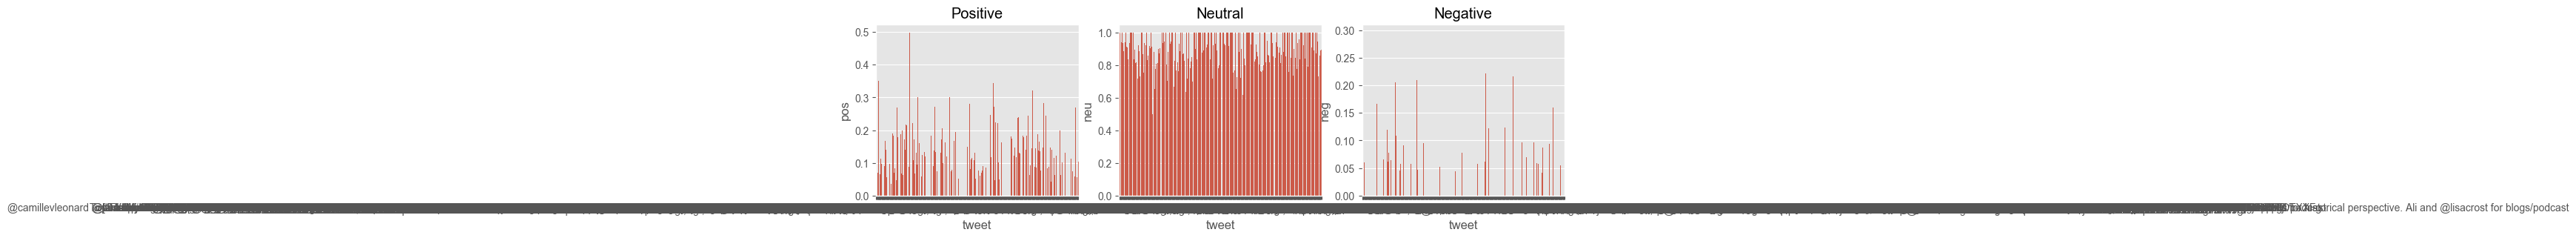

In [21]:
# Set the font family for the entire Matplotlib backend
plt.rcParams['font.family'] = 'Arial Unicode MS'

# Your plotting code
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='tweet', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='tweet', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='tweet', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [22]:
#calculating sentiments
from textblob import TextBlob
def GetTextSubjectivity(txt):
    txt=str(txt)
    return TextBlob(txt).sentiment.subjectivity

def GetTextPolarity(txt):
    txt=str(txt)
    return TextBlob(txt).sentiment.polarity

df['Subjectivity'] = df['tweet'].apply(GetTextSubjectivity)
df['Polarity'] = df['tweet'].apply(GetTextPolarity)

def GetTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"
    
df["Score"]=df['Polarity'].apply(GetTextAnalysis)

In [23]:
positive=df[df['Score']=='Positive']
print (str(round(positive.shape[0]/(df.shape[0])*100)) + "% Positive tweets")
pos = positive.shape[0]/(df.shape[0])*100

negative=df[df['Score']=='Negative']
print (str(round(negative.shape[0]/(df.shape[0])*100)) + "% Negative tweets")
neg = negative.shape[0]/df.shape[0]*100

neutral=df[df['Score']=='Neutral']
print (str(round((neutral.shape[0])/(df.shape[0])*100)) + "% neutral tweets")
neu = neutral.shape[0]/df.shape[0]*100


52% Positive tweets
9% Negative tweets
39% neutral tweets


(-1.1032961298539836,
 1.1001569585644342,
 -1.1024892411504343,
 1.1523960422290973)

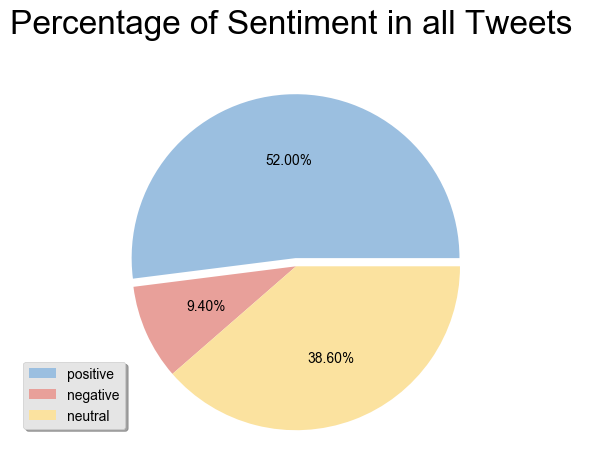

In [24]:
#viewing % posi , neg , neu tweets
explode=(0.05,0,0)
labels = 'positive','negative','neutral'
sizes = [pos,neg,neu]
colours=['#9BBFE0','#E8A09A','#FBE29F']
plt.pie(sizes,explode=explode,colors=colours,autopct='%.2f%%',startangle=0)
plt.title('Percentage of Sentiment in all Tweets \n', fontsize=24)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')

Roberta pre trained Model

Transformer model that accounts for words but also the context related to other words

In [25]:
# transformer a hugging face library
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [26]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)#pre-trained RoBERTa model that has already been fine-tuned on Twitter data for sentiment analysis tasks
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [27]:
#VADER results on example
print(example)
sia.polarity_scores(example)

What can be done?  - Never blindly trust an abstract, a press release or a secondary source - Try to inspect the actual data (or the figures) - Accept it may well all be nonsense (even more so if the findings are extraordinary - sound science is often boring) 8/


{'neg': 0.108, 'neu': 0.798, 'pos': 0.094, 'compound': -0.1783}

In [28]:
#Using Roberta model
encoded_text = tokenizer(example, return_tensors='pt') # tensors are the form that can be feeded as input
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores) # the softmax function here converts these scores into probabilities, making them interpretable as confidence scores for each sentiment class.
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.7616824, 'roberta_neu': 0.21177867, 'roberta_pos': 0.026538959}


In [29]:
def polarity_score_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt') # tensors are the form that can be feeded as input
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores) # the softmax function here converts these scores into probabilities, making them interpretable as confidence scores for each sentiment class.
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [30]:
#run the polarity score on the entire dataset
res = {}
for index, row in tqdm(df.iterrows(), total=len(df)):
    tweet = row['tweet']
    myid = row['id']
    vader_result = sia.polarity_scores(tweet)
    vader_result_rename = {}
    for key , value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value

    roberta_result = polarity_score_roberta(tweet)
    both = {**vader_result_rename, **roberta_result}
    res[myid] = both

  0%|          | 0/500 [00:00<?, ?it/s]

In [31]:
results_df = pd.DataFrame(res).T # T is n attribute that transposes the dataframe swapping the rows and columns, so that the sentiment scores become column headers and the IDs become row indices.
results_df = results_df.reset_index().rename(columns={'index':'id'})
results_df = results_df.merge(df, how='left')

In [32]:
results_df.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,conversation_id,created_at,...,link,retweet,video,reply_to,year,month,clean_tweet,Subjectivity,Polarity,Score
0,1406400408545804288,0.108,0.798,0.094,-0.1783,0.761682,0.211779,0.026539,1406400396264943616,2021-06-20 05:26:01 IST,...,https://twitter.com/BallouxFrancois/status/140...,False,0,[],2021,6,What can be done Never blindly trust an abst...,0.566667,0.026190,Positive
1,1406390341176016897,0.109,0.750,0.141,0.0000,0.507395,0.437089,0.055517,1406390341176016897,2021-06-20 04:46:01 IST,...,https://twitter.com/TDataScience/status/140639...,False,0,[],2021,6,We need a paradigm shift from modelcentric to ...,0.400000,0.000000,Neutral
2,1406386311481774083,0.000,1.000,0.000,0.0000,0.037146,0.832267,0.130587,1406386311481774083,2021-06-20 04:30:00 IST,...,https://twitter.com/ScienceNews/status/1406386...,False,0,[],2021,6,Using highresolution satellite data and comput...,0.500000,-0.333333,Negative
3,1406383545153638402,0.000,0.601,0.399,0.7430,0.002241,0.195962,0.801798,1406383545153638402,2021-06-20 04:19:01 IST,...,https://twitter.com/TDataScience/status/140638...,False,0,[],2021,6,StephensonData shares four steps that will hel...,0.477273,0.234848,Positive
4,1406358632648818689,0.000,0.930,0.070,0.4019,0.132453,0.648385,0.219162,1406358632648818689,2021-06-20 02:40:01 IST,...,https://twitter.com/TDataScience/status/140635...,False,0,[],2021,6,Curricula is inherently brittle in a world whe...,0.350000,0.100000,Positive


Compare Scores between models

In [33]:
results_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'conversation_id',
       'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name',
       'tweet', 'language', 'mentions', 'urls', 'photos', 'replies_count',
       'retweets_count', 'likes_count', 'hashtags', 'cashtags', 'link',
       'retweet', 'video', 'reply_to', 'year', 'month', 'clean_tweet',
       'Subjectivity', 'Polarity', 'Score'],
      dtype='object')

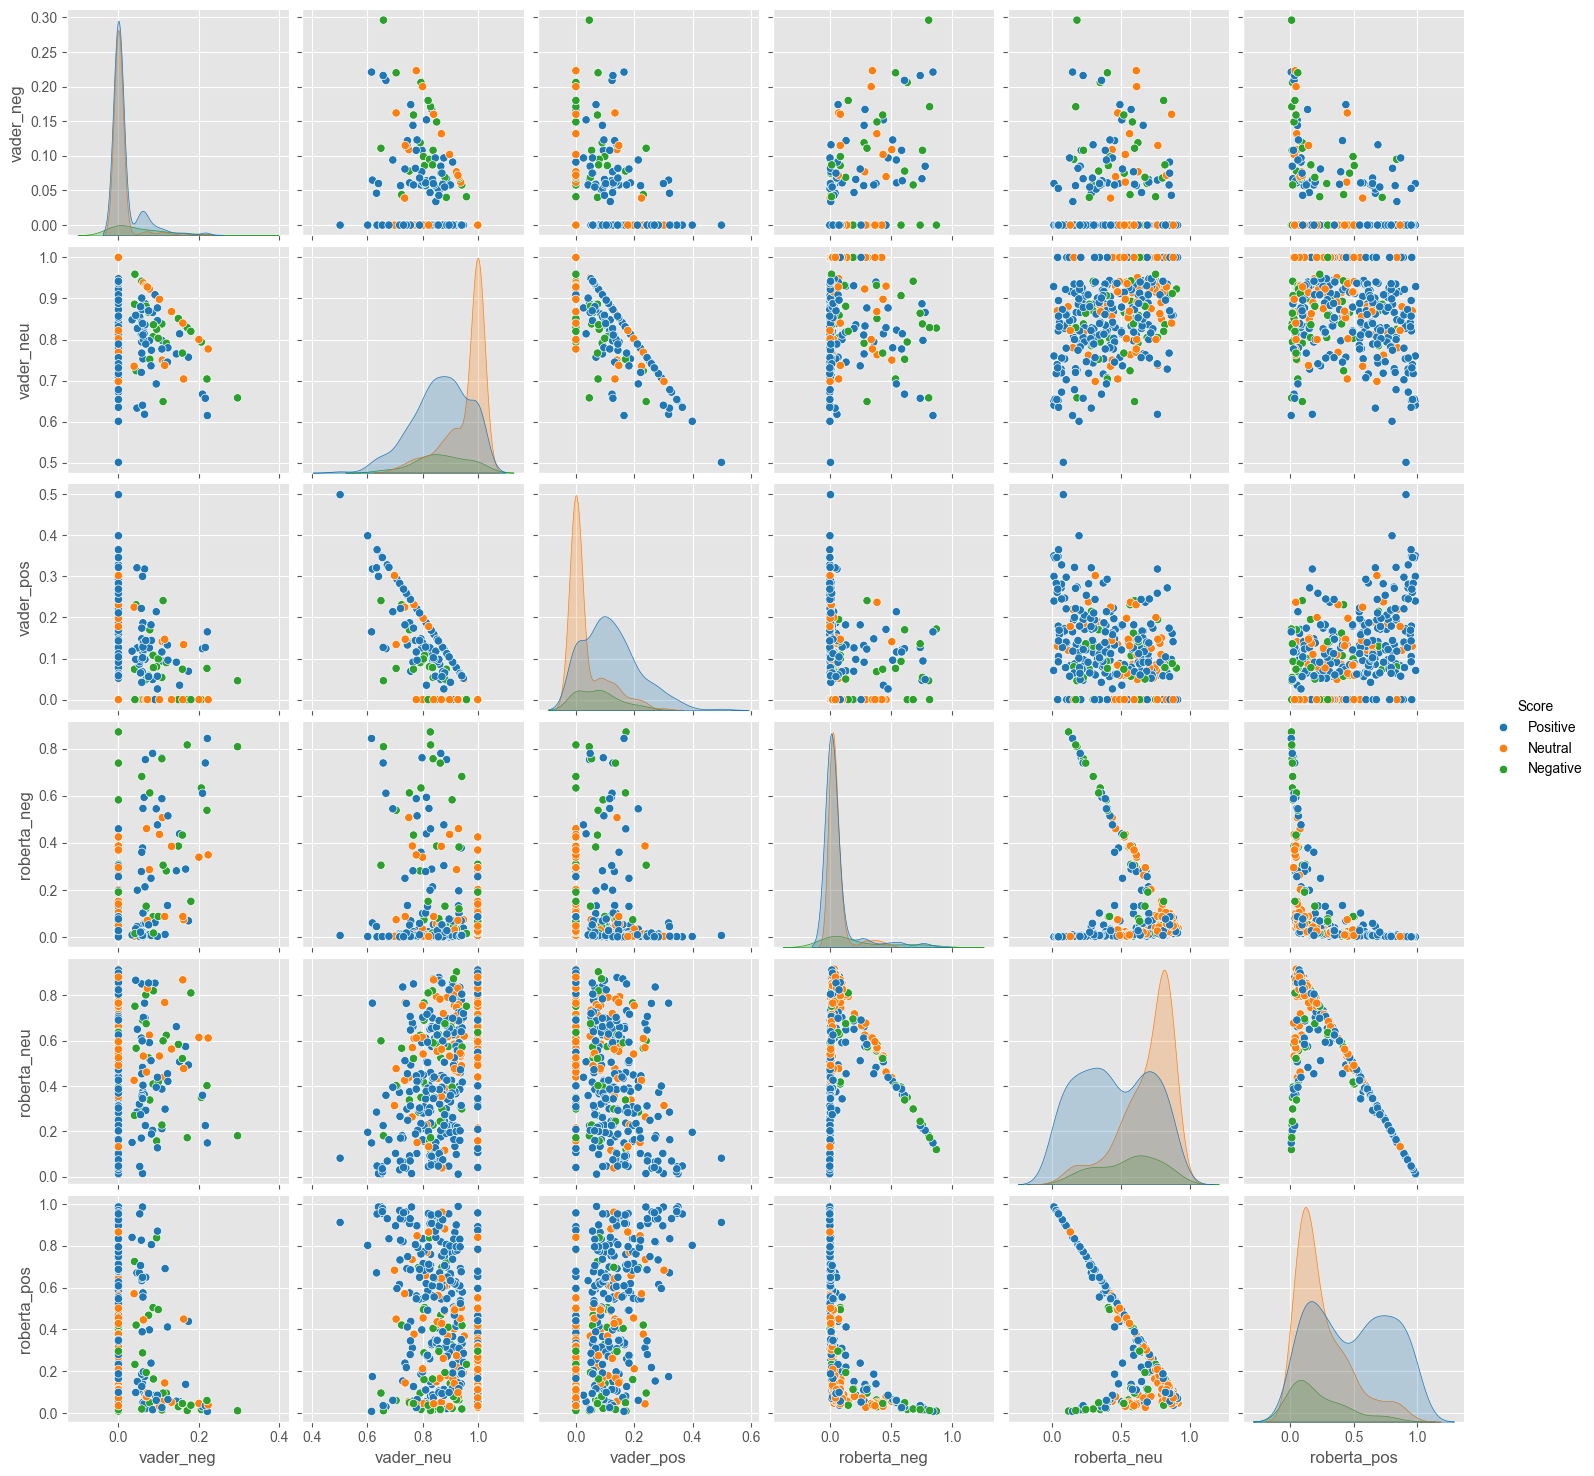

In [34]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [35]:
positive_tweets = results_df.query('Score == 1')
if not positive_tweets.empty:
    most_positive_tweet = positive_tweets.sort_values('roberta_pos', ascending=False)['tweet'].values[0]
    print("Most positive tweet:", most_positive_tweet)
else:
    print("There are no tweets classified as highly positive.")


There are no tweets classified as highly positive.


The Transformers Pipeline

In [36]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [37]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [38]:
sent_pipeline('I felt like I was drowning in despair, suffocated by the weight of endless suffering.')

[{'label': 'NEGATIVE', 'score': 0.9977428913116455}]

In [41]:
import gradio as gr
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from nltk.sentiment import SentimentIntensityAnalyzer

# Load RoBERTa model
roberta_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
roberta_tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

# Load VADER model
vader_analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(tweet, model):
    if model == "VADER":
        scores = vader_analyzer.polarity_scores(tweet)
        compound_score = scores["compound"]
        if compound_score >= 0.05:
            sentiment = "Positive"
        elif compound_score <= -0.05:
            sentiment = "Negative"
        else:
            sentiment = "Neutral"
        confidence_score = abs(compound_score)
    else:  # RoBERTa model
        encoded_text = roberta_tokenizer(tweet, return_tensors='pt')
        output = roberta_model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        pos_score, neu_score, neg_score = scores
        max_score = max(pos_score, neu_score, neg_score)
        if max_score == pos_score:
            sentiment = "Positive"
            confidence_score = pos_score
        elif max_score == neu_score:
            sentiment = "Neutral"
            confidence_score = neu_score
        else:
            sentiment = "Negative"
            confidence_score = neg_score

    return f"Sentiment: {sentiment}, Confidence Score: {confidence_score:.2f}"

iface = gr.Interface(
    fn=analyze_sentiment,
    inputs=[
        gr.components.Textbox(label="Tweet"),  # Updated input component
        gr.components.Dropdown(["VADER", "RoBERTa"], label="Model")
    ],
    outputs="text",
    title="Sentiment Analysis",
    description="Enter a tweet and select the model (VADER or RoBERTa) to analyze its sentiment.",
    examples=[
        ["I love this movie!", "VADER"],
        ["This movie is terrible.", "RoBERTa"]
    ]
)

iface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
